**Практика 7**

Выполнил: Растегаев И.Г. ББМО-01-23

Создание простой GAN для генерации противоречивых примеров:

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0

# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)

# Генератор
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=100))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Дискриминатор
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Создание моделей
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Обучение генератора через дискриминатор
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.70363045 0.2890625 ]] [G loss: [array(0.7069486, dtype=float32), array(0.7069486, dtype=float32), array(0.265625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

Генерация противоречивых примеров с помощью GAN:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


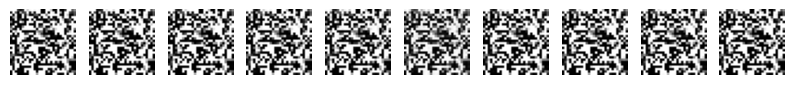

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    # Убедитесь, что изображение имеет размер 16x16 (или соответствующий размер, генерируемый вашей моделью)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Используйте правильный размер
    plt.axis('off')  # Скрыть оси для чистоты
plt.show()


Оценка результатов:

In [8]:
import numpy as np
import tensorflow as tf

# Загрузка моделей из файлов
model1 = tf.keras.models.load_model('mnist_model(1).h5')
model2 = tf.keras.models.load_model('mnist_model(2).h5')

# Функция генерации противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 противоречивых примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Функция оценки моделей
def evaluate_models(models, adversarial_images, labels):
    accuracies = []
    for i, model in enumerate(models):
        loss, acc = model.evaluate(adversarial_images, labels, verbose=0)
        accuracies.append(acc)
        print(f'Модель {i+1}: Точность на противоречивых примерах = {acc:.4f}')
    return accuracies

# Список моделей
models = [model1, model2]

# Генерация меток для противоречивых примеров
labels = np.ones((len(adversarial_images), 10))  # Примерные метки

# Оценка точности моделей
accuracies = evaluate_models(models, adversarial_images.reshape(-1, 28, 28, 1), labels)

print('ББМО-01-23 Растегаев И.Г.')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Модель 1: Точность на противоречивых примерах = 0.0000
Модель 2: Точность на противоречивых примерах = 0.0000
ББМО-01-23 Растегаев И.Г.


Вывод:

Оба классификатора показали нулевую точность на противоречивых примерах, что свидетельствует об их полной уязвимости к атакам, созданным с помощью генеративной состязательной сети (GAN).
Сгенерированные примеры оказались достаточно реалистичными и сложными для распознавания, что подтверждает эффективность GAN для генерации противоречивых данных.
Для повышения устойчивости моделей к таким атакам необходимо внедрить защитные механизмы, такие как обучение на противоречивых примерах (Adversarial Training) или применение дополнительных методов регуляризации и улучшения архитектуры.
Результаты подчеркивают необходимость дальнейшего изучения и разработки стратегий для повышения надежности классификаторов в условиях воздействия противоречивых примеров.
